/home/heinrich/miniconda3/envs/reinforcment-learning/lib/python3.11/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


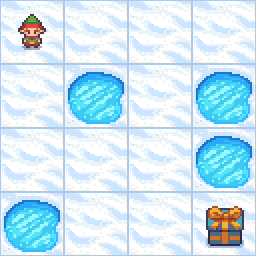

Pick direction ('ZQSD') or A to quit !s
DOWN !


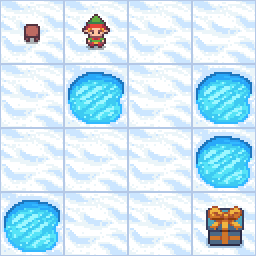

Pick direction ('ZQSD') or A to quit !z
UP !


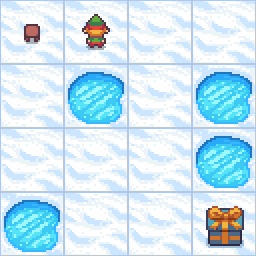

Pick direction ('ZQSD') or A to quit !z
UP !


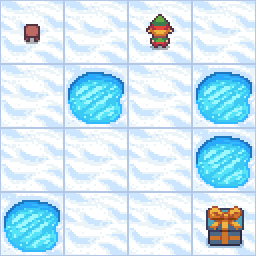

In [ ]:
import gymnasium as gym
from gymnasium.utils.play import play
from gymnasium.envs.toy_text.frozen_lake import generate_random_map
from PIL import Image
import numpy as np
from IPython.display import display # to display images

# from nptyping import NDArray, Shape, Int
from typing import TypeVar, List, Tuple
# https://www.gymlibrary.dev/environments/toy_text/frozen_lake/
# map_name "4*4"
# "4x4":[
#     "SFFF",
#     "FHFH",
#     "FFFH",
#     "HFFG"
#     ]
# Actions
# 0: LEFT
# 1: DOWN
# 2: RIGHT
# 3: UP

environment = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True, render_mode="rgb_array")

# Utility functions
# The coordinate (0, 0) correspond to the top left start cell and the goal to the bottom right
# It follow the same convention as the observation space

def displayGame(environment):
    rgb_array = environment.render()
    image = Image.fromarray(rgb_array)
    display(image)
    pass

def parseInput(input):
    match input:
        case 'a':
            print("Quitting .. !")
            return(-1)
        case 'A':
            print("Quitting .. !")
            return(-1)
        case 'z':
            print('UP !')
            return(3)
        case 'Z':
            print('UP !')
            return(3)
        case 'q':
            print('LEFT !')
            return(0)
        case 'Q':
            print('LEFT !')
            return(0)
        case 's':
            print('DOWN !')
            return(1)
        case 'S':
            print('DOWN !')
            return(1)
        case 'd':
            print('RIGHT !')
            return(2)
        case 'D':
            print('RIGHT !')
            return(2)
        case _:
            print("Pick a valid key ! z|Z|q|Q|s|S|d|D, or a|A to quit")

desc=["SFFF", "FHFH", "FFFH", "HFFG"] # Same as the map called "4*4"
dimension_desc = (4, 4)
nrow = 4
ncol = 4
environment = gym.make('FrozenLake-v1', desc=desc, is_slippery=True, render_mode="rgb_array")
environment.reset()


displayGame(environment)
stop = False

while not stop:
    '''
    While Agent is not stopped
    Pick an action
    Environment compute the action
    Update the stop condition if Goal reached or terminated
    '''
    direction = input("Pick direction ('ZQSD') or A to quit !")
    code = parseInput(direction)
    if code is not None and code >= 0:
        observation, reward, terminated, truncated, info = environment.step(code)
        displayGame(environment)
        if reward == 1:
            print("VICTORY !")
        stop = terminated or truncated
        pass
    elif code is not None:
        stop = True

